# System 2

True Positives (tp): 385
True Negatives (tn): 4822
False Positives (fp): 76
False Negatives (fn): 1214
Accuracy: 0.80
Recall: 0.24
Precision: 0.84
F1: 0.37


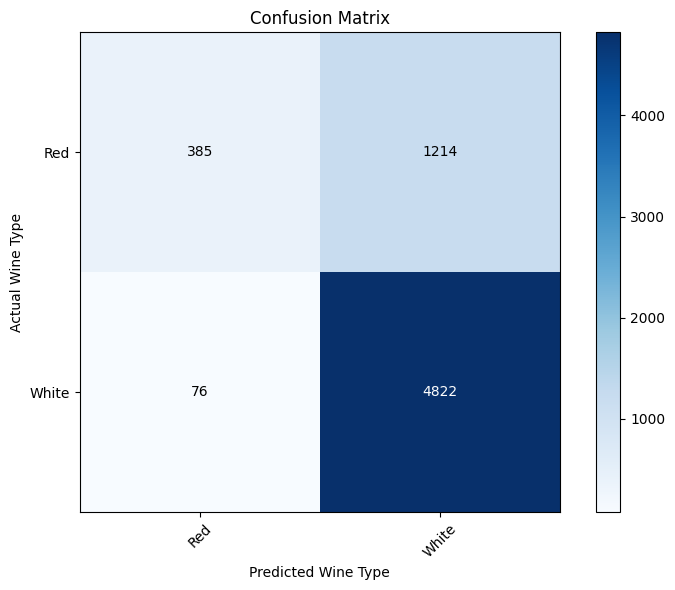

In [ ]:
# Imports necessary librarys
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot
import seaborn as sb

# Reading CSV files and putting them in data frames.
df_red = pd.read_csv(r'data\winequality-red.csv', sep=";")

df_white = pd.read_csv(r'data\winequality-white.csv', sep=";")

# Adding new column for actual wine type and assigning red/white to both data frames.
df_red["actual_wine"] = 'red'

df_white["actual_wine"] = 'white'

# Adding new column for predicted wine type with a placeholder of na, this is later modified with the prediction.
df_red["predicted_wine"] = 'na'

df_white["predicted_wine"] = 'na'

# Concatenating both data frames together to form a single data frame.
concat_df = pd.concat([df_red, df_white], axis=0)

# Initialize variables for confusion metrics.
tp = 0
tn = 0
fp = 0
fn = 0

for index, row in concat_df.iterrows():
    # Determine predicted wine type
    # Inference engine which uses backward chaining based on research.

    # Alcohol level in red wine is typically higher than white.
    # Typically wines with more colour (red wine) have less sulfites than clear wines (white wine).
    # Based on the higher content of sulfites it can be assumed that there will be less residual sugar.
    if row['alcohol'] >= 11 and \
       row['total sulfur dioxide'] >= 5 and row['total sulfur dioxide'] <= 90 and \
       row['sulphates'] >= 0.55 and \
       row['residual sugar'] <= 8:
        predicted_wine = 'red'
    else:
        predicted_wine = 'white'

    # Assign predicted wine type to the DataFrame
    concat_df.at[index, 'predicted_wine'] = predicted_wine


    # Update tp, tn, fp, fn based on the predicted and actual values
    if predicted_wine == 'red' and row['actual_wine'] == 'red':
        tp += 1
    elif predicted_wine == 'red' and row['actual_wine'] == 'white':
        fp += 1
    elif predicted_wine == 'white' and row['actual_wine'] == 'red':
        fn += 1
    elif predicted_wine == 'white' and row['actual_wine'] == 'white':
        tn += 1

print(f"True Positives (tp): {tp}")
print(f"True Negatives (tn): {tn}")
print(f"False Positives (fp): {fp}")
print(f"False Negatives (fn): {fn}")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * ((precision * recall) / (precision + recall))
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1: {f1:.2f}")


# The confusion matrix was generated using ChatGPT, for the purpose of generating visual representation of the confusion matrix heatmap.

# Manually create a confusion matrix using these variables
cm = [[tp, fn],  # First row: [True Positives, False Negatives]
      [fp, tn]]  # Second row: [False Positives, True Negatives]

# Labels for the confusion matrix
labels = ['Red', 'White']

# Plotting the confusion matrix using matplotlib
plot.figure(figsize=(8, 6))
plot.imshow(cm, interpolation='nearest', cmap=plot.cm.Blues)
plot.title("Confusion Matrix")
plot.colorbar()

# Add labels for axes
plot.xticks([0, 1], labels, rotation=45)
plot.yticks([0, 1], labels)

# Add text annotations to the cells
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plot.text(j, i, str(cm[i][j]),
                 ha="center", va="center",
                 color="white" if cm[i][j] > max(tp, tn) / 2 else "black")

plot.ylabel("Actual Wine Type")
plot.xlabel("Predicted Wine Type")
plot.tight_layout()
plot.show()

concat_df.to_csv('results2.csv')
